In [3]:
from scipy.misc import imread
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
     

%matplotlib inline

In [2]:
%%bash
pip install matplotlib

  Running setup.py bdist_wheel for subprocess32: started
  Running setup.py bdist_wheel for subprocess32: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/7d/4c/a4/ce9ceb463dae01f4b95e670abd9afc8d65a45f38012f8030cc
Successfully built subprocess32


In [5]:
base_dir = "data/training-set/GTSRB/Final_Training/Images/"
            
def partial_data():
    for cls_string in os.listdir(base_dir):
        csv_path = base_dir + "/{0}/GT-{0}.csv".format(cls_string)
        
        df = pd.read_csv(csv_path, sep=";")
        df['Filename'] = base_dir + cls_string + "/" + df['Filename']
        
        yield df


def data_batch_iterator(batch_size):
    
    data = partial_data()
    data = pd.concat(data)
    
    while True:
        batch = data.sample(n=batch_size)
        batch["Image"] = batch.Filename.apply(imread)
        
        yield batch
        


In [6]:
next(data_batch_iterator(5))

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Image
2008,data/training-set/GTSRB/Final_Training/Images/...,56,58,5,6,51,53,10,"[[[173, 189, 202], [172, 190, 202], [172, 190,..."
1447,data/training-set/GTSRB/Final_Training/Images/...,36,37,5,6,31,32,1,"[[[70, 55, 52], [67, 51, 54], [67, 54, 61], [8..."
1784,data/training-set/GTSRB/Final_Training/Images/...,47,48,5,5,42,42,1,"[[[60, 55, 52], [49, 45, 44], [41, 37, 34], [5..."
1828,data/training-set/GTSRB/Final_Training/Images/...,70,76,7,7,64,70,38,"[[[14, 13, 11], [16, 14, 15], [14, 14, 16], [1..."
1654,data/training-set/GTSRB/Final_Training/Images/...,31,32,5,6,26,27,5,"[[[63, 69, 81], [63, 61, 74], [93, 90, 101], [..."


class: 12, shape: (32, 32, 3)


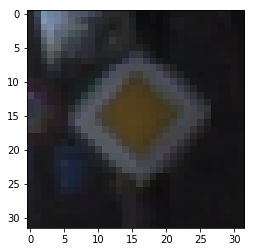

class: 8, shape: (32, 32, 3)


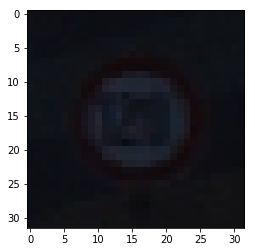

class: 35, shape: (32, 32, 3)


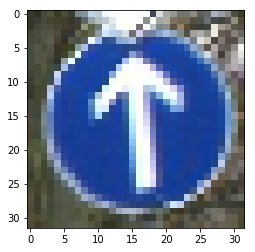

class: 10, shape: (32, 32, 3)


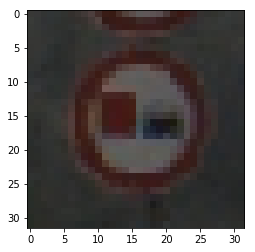

class: 7, shape: (32, 32, 3)


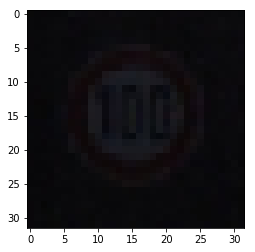

class: 23, shape: (32, 32, 3)


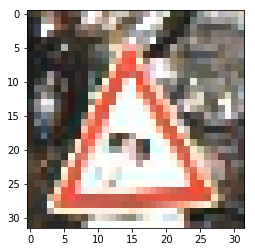

class: 35, shape: (32, 32, 3)


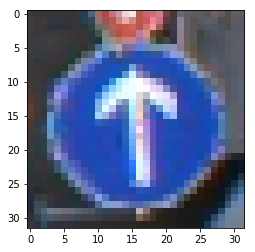

class: 5, shape: (32, 32, 3)


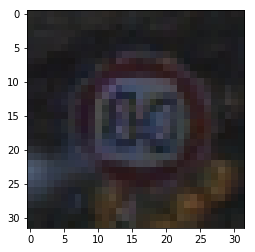

class: 21, shape: (32, 32, 3)


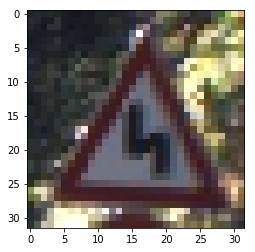

class: 39, shape: (32, 32, 3)


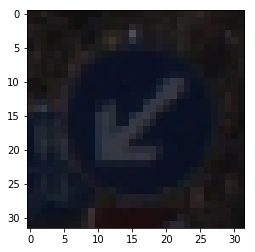

In [8]:
batch_size = 10
batch = next(data_batch_iterator(batch_size))

for i, row in batch.iterrows():
    img = row.Image
    print("class: {}, shape: {}".format(row.ClassId, img.shape))
    plt.imshow(img)
    plt.show()

In [69]:
import tensorflow as tf
sess = tf.InteractiveSession()


x = tf.placeholder(tf.int8, [None, None, 3])

In [80]:
r = tf.image.resize_images(x, [63, 63])
r =  tf.cast(255 - r, tf.int8)

(63, 60, 3)


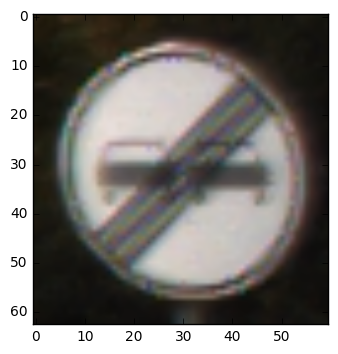

(63, 63, 3)


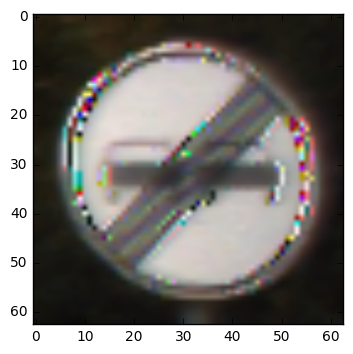

In [81]:
oimg = batch.Image.iloc[0]
img = sess.run(r, {x: oimg})

print(oimg.shape)
plt.imshow(oimg)
plt.show()

print(img.shape)
plt.imshow(img)
plt.show()

In [54]:
tf.constant(255, dtype=tf.int8)

<tf.Tensor 'Const_1:0' shape=() dtype=int8>